In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [2]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')


In [3]:
# Step 1: Data Cleaning and Exploration
print("Initial dataset shape:", df.shape)
print(df.info())
print(df.describe())


Initial dataset shape: (200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
5

In [4]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
# Drop rows with missing values (if applicable)
df.dropna(inplace=True)


In [10]:
# Ensure the selected columns exist in the dataset
expected_columns = ['Annual Income (k$)', 'Spending Score (1-100)']
columns_for_clustering = [col for col in expected_columns if col in df.columns]
if len(columns_for_clustering) < len(expected_columns):
    missing_cols = set(expected_columns) - set(columns_for_clustering)
    print(f"Warning: Missing columns in dataset: {missing_cols}")

In [11]:
# Step 2: Data Preprocessing
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[columns_for_clustering])

In [17]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)  # Apply PCA
print(data_pca[:5])

[[-1.5371092  -0.92220705]
 [-0.38416767 -2.07514858]
 [-2.41600197  0.01066545]
 [-0.46698176 -1.93835476]
 [-1.45567848 -0.89567831]]


In [18]:
# Step 3: K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(data_pca)
print("K-Means Silhouette Score:", silhouette_score(data_pca, kmeans_labels))

K-Means Silhouette Score: 0.49434988482109504


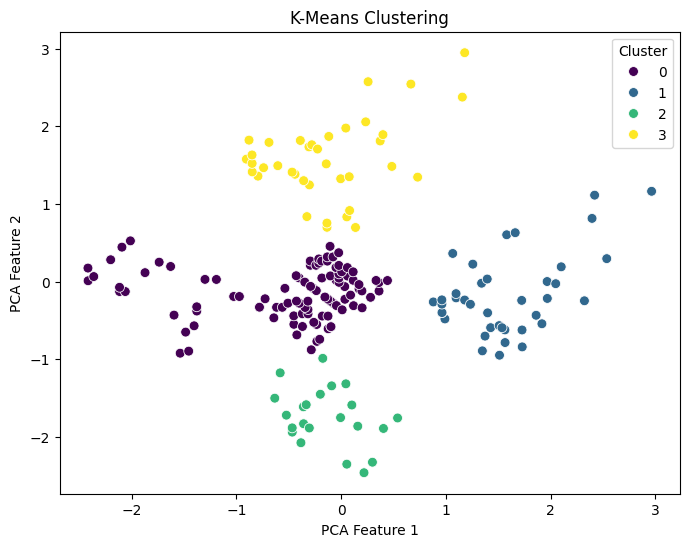

In [19]:
# Visualize K-Means clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=kmeans_labels, palette='viridis', s=50)
plt.title("K-Means Clustering")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.legend(title="Cluster")
plt.show()

In [20]:
# Step 4: DBSCAN Clustering
# Tune DBSCAN parameters if needed
eps_value = 0.5
min_samples_value = 5
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_labels = dbscan.fit_predict(data_pca)

In [21]:
# Handle noise points in DBSCAN
unique_labels = set(dbscan_labels)
noise_points = list(dbscan_labels).count(-1)
print(f"DBSCAN found {len(unique_labels) - 1} clusters and {noise_points} noise points.")

DBSCAN found 2 clusters and 8 noise points.


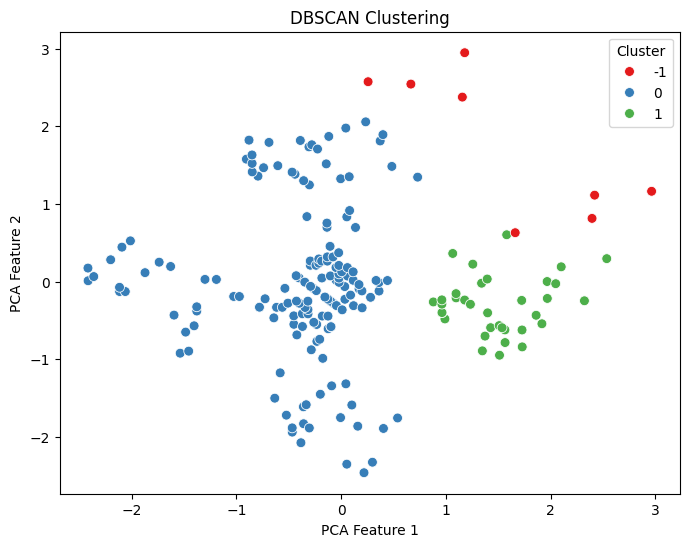

In [22]:
# Visualize DBSCAN clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=dbscan_labels, palette='Set1', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.legend(title="Cluster")
plt.show()


In [23]:
# Step 5: Insights and Interpretation
# Add cluster labels back to the original dataset
df['KMeans_Cluster'] = kmeans_labels
df['DBSCAN_Cluster'] = dbscan_labels

# Save the processed dataset with cluster labels
df.to_csv('customer_segments.csv', index=False)

print("Customer segmentation complete! Results saved to 'customer_segments.csv'.")


Customer segmentation complete! Results saved to 'customer_segments.csv'.
